In [1]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd

# load container for plotting
evoked = helpers.load_evoked_container()

Reading data/meg_final_data/evoked_hfreq10.0_sfreq100.0_window0.40-0.70_mag-ave.fif ...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Found the data of interest:
        t =     400.00 ...     700.00 ms (Unknown)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


In [62]:
# plotting function
def plot_topo(data, times=np.linspace(0.4, 0.7, 8), scale=1, 
              vmin=None, vmax=None, cmap=None, unit=None):
    
    for reg in data.columns:
        evoked.data = data[reg].values.reshape(evoked.data.shape)
        evoked.comment = reg
    
        fig = evoked.plot_topomap(times, scale=scale, vmin=vmin, vmax=vmax, 
                                  cmap=cmap, unit=unit)
        fig.set_label(reg)

# ADVI

<IPython.core.display.Javascript object>


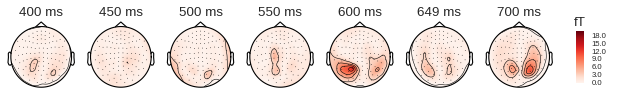

<IPython.core.display.Javascript object>


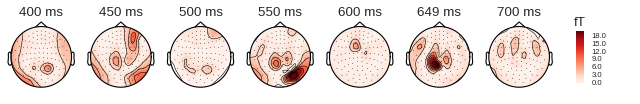

<IPython.core.display.Javascript object>


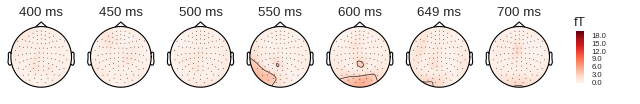

<IPython.core.display.Javascript object>


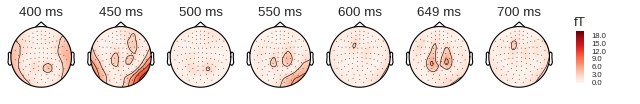

<IPython.core.display.Javascript object>


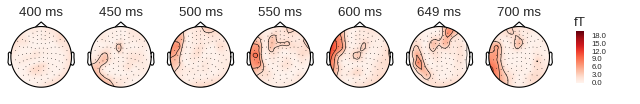

<IPython.core.display.Javascript object>


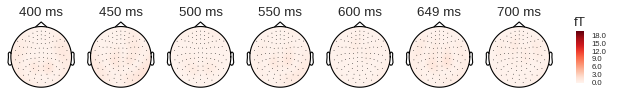

In [3]:
times = 
for reg in pvals.columns:
    evoked.data = -np.log10(pvals[reg].values.reshape(evoked.data.shape))
    evoked.comment = reg
    
    fig = evoked.plot_topomap(times, scale=1, vmin=0, vmax=20, cmap=('Reds', False))
    fig.set_label(reg)

# Summary statistic approach

In [63]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss.h5', 'second_level')
# times = np.linspace(0.55, 0.7, 8)

In [64]:
second_level.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_y,entropy,intercept,logpost_left,surprise,trial_time
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,0.890638,0.878519,0.862816,1.137986,0.719266,0.589539
std,0.964177,0.968680,0.885133,1.293683,0.790991,0.556023
min,0.000522,0.000135,0.000498,0.000281,0.000123,0.000399
25%,0.222144,0.221898,0.211784,0.252516,0.176434,0.174901
50%,0.564182,0.541096,0.579542,0.678801,0.430729,0.419708
75%,1.211604,1.193168,1.233477,1.505301,0.982718,0.840543
max,6.503528,8.730784,5.798568,8.719796,5.491009,3.532959


## t-values
Note that these are not exactly the t-values underlying the negative log10 p-values stored in second_level, because scipy.stats uses a different denominator when computing variances and standard deviations than the default used by numpy (N-1 in scipy.stats vs. N in numpy default).

<IPython.core.display.Javascript object>


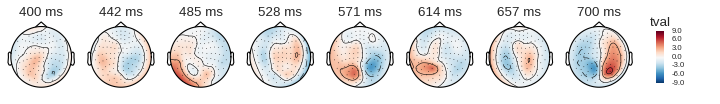

<IPython.core.display.Javascript object>


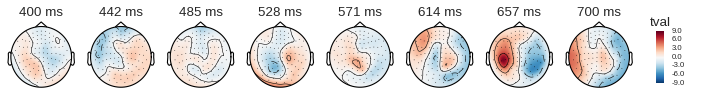

<IPython.core.display.Javascript object>


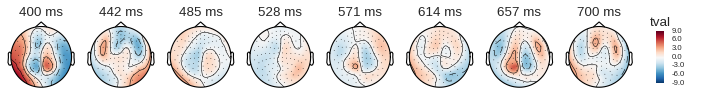

<IPython.core.display.Javascript object>


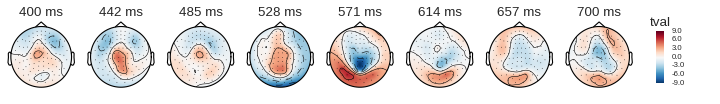

<IPython.core.display.Javascript object>


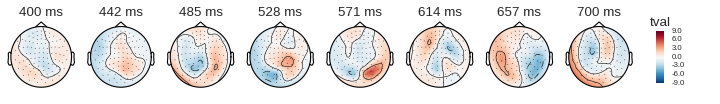

<IPython.core.display.Javascript object>


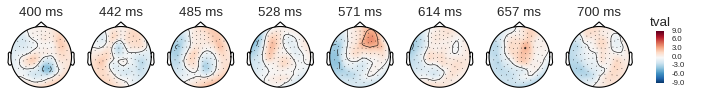

In [65]:
data = (second_level.xs('mean', axis=1, level='measure')  / 
        second_level.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')

## Estimated mean parameter values

<IPython.core.display.Javascript object>


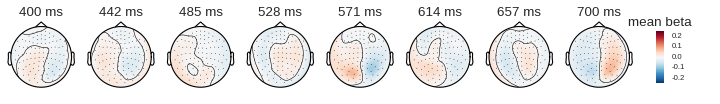

<IPython.core.display.Javascript object>


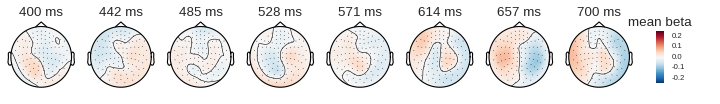

<IPython.core.display.Javascript object>


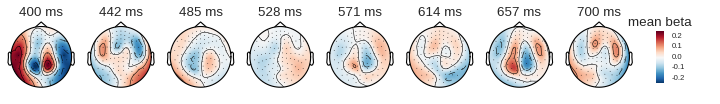

<IPython.core.display.Javascript object>


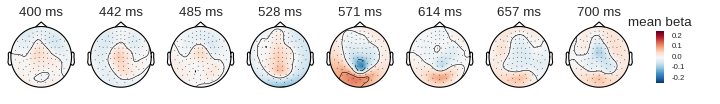

<IPython.core.display.Javascript object>


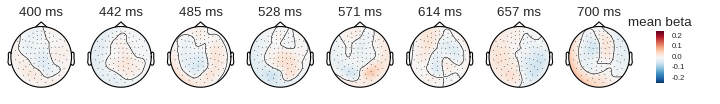

<IPython.core.display.Javascript object>


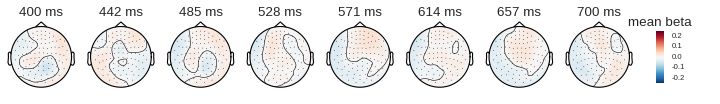

In [66]:
plot_topo(second_level.xs('mean', axis=1, level='measure'), 
          times, vmin=-0.2, vmax=0.2, unit='mean beta')

## Between-subject standard deviation

<IPython.core.display.Javascript object>


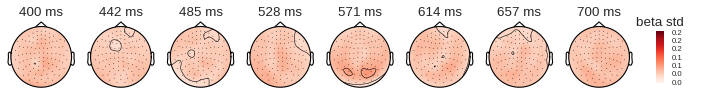

<IPython.core.display.Javascript object>


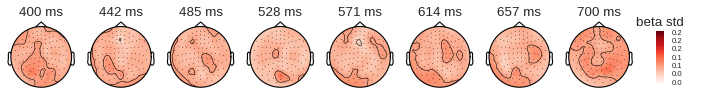

<IPython.core.display.Javascript object>


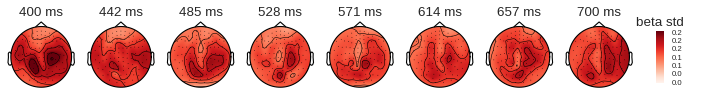

<IPython.core.display.Javascript object>


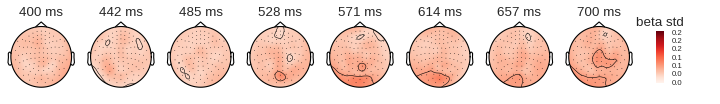

<IPython.core.display.Javascript object>


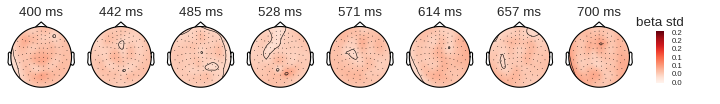

<IPython.core.display.Javascript object>


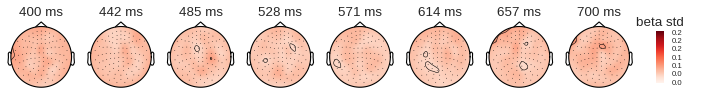

In [67]:
plot_topo(second_level.xs('std', axis=1, level='measure'), 
          times, vmin=0, vmax=0.25, unit='beta std')